# K-Means Clustering

## Importing the libraries

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv("Mall_Customers.csv")

# this time there is no dependent variable to start with; we are going to generate them 
# the customer ID column is worthless and should be excluded
# to get a 2D chart, we will use only income and spending score (columns 3 and 4)
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

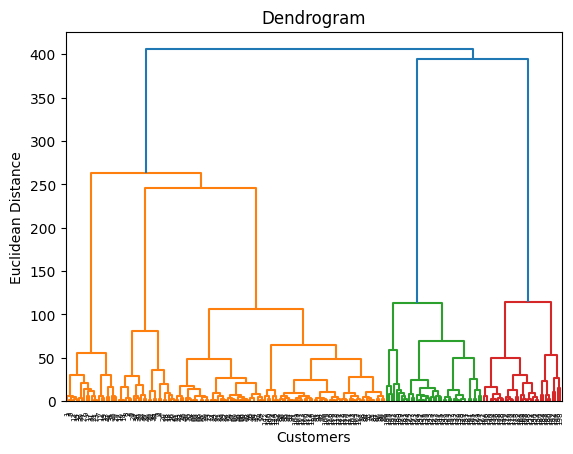

In [6]:
# equivalent to "sch = from scipy.cluster import hierarchy"
# "ward" minimizes the variance inside the clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
# Y axis label is always the same
plt.ylabel("Euclidean Distance")
plt.show()
# save the output dendrogram as an image, draw a horizontal line that represents the largest distance you can move vertically without touching another horizontal line
# three and five clusters are very close; either would be a good choice. Not four though 

## Training the Hierarchical Clustering model on the dataset

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualizing the clusters

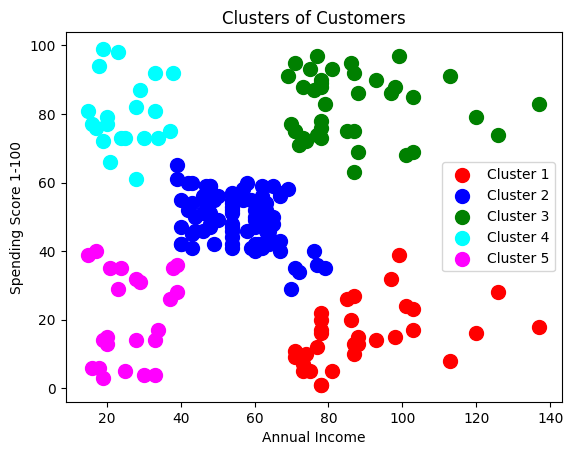

In [10]:
# this only selects the customers that the y_hc list has a 0 for (I don't totally understand this syntax)
# x axis is income, y axis is spending score
plt.scatter(X[y_hc == 0 ,0], X[y_hc == 0, 1], s=100, c= "red", label = "Cluster 1")
plt.scatter(X[y_hc == 1 ,0], X[y_hc == 1, 1], s=100, c= "blue", label = "Cluster 2")
plt.scatter(X[y_hc == 2 ,0], X[y_hc == 2, 1], s=100, c= "green", label = "Cluster 3")
plt.scatter(X[y_hc == 3 ,0], X[y_hc == 3, 1], s=100, c= "cyan", label = "Cluster 4")
plt.scatter(X[y_hc == 4 ,0], X[y_hc == 4, 1], s=100, c= "magenta", label = "Cluster 5")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score 1-100")
plt.legend()
plt.show()
